<a href="https://colab.research.google.com/github/TanyalaSrivatsava/NLP/blob/main/Assignment_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

nltk.download('stopwords', quiet=False)
nltk.download('punkt', quiet=False)
nltk.download('wordnet', quiet=False)
nltk.download('omw-1.4', quiet=False)
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [4]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df = df[['text', 'airline_sentiment']]
df.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [6]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)          # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)       # remove punctuation & numbers
    tokens = word_tokenize(text)               # tokenize
    tokens = [lemmatizer.lemmatize(word)
              for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [8]:
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()


,text,airline_sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,virginamerica plus youve added commercial expe...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,negative,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,virginamerica really big bad thing


In [9]:
positive_reviews = df[df['airline_sentiment'] == 'positive']['clean_text']
negative_reviews = df[df['airline_sentiment'] == 'negative']['clean_text']
neutral_reviews  = df[df['airline_sentiment'] == 'neutral']['clean_text']


In [10]:
tfidf_pos = TfidfVectorizer(max_features=5000)
tfidf_neg = TfidfVectorizer(max_features=5000)
tfidf_neu = TfidfVectorizer(max_features=5000)

pos_tfidf_matrix = tfidf_pos.fit_transform(positive_reviews)
neg_tfidf_matrix = tfidf_neg.fit_transform(negative_reviews)
neu_tfidf_matrix = tfidf_neu.fit_transform(neutral_reviews)


In [11]:
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=15):
    avg_tfidf = np.mean(tfidf_matrix.toarray(), axis=0)
    top_indices = avg_tfidf.argsort()[::-1][:top_n]
    return [(feature_names[i], avg_tfidf[i]) for i in top_indices]


In [12]:
top_pos_words = get_top_tfidf_words(
    pos_tfidf_matrix, tfidf_pos.get_feature_names_out()
)

top_neg_words = get_top_tfidf_words(
    neg_tfidf_matrix, tfidf_neg.get_feature_names_out()
)

top_neu_words = get_top_tfidf_words(
    neu_tfidf_matrix, tfidf_neu.get_feature_names_out()
)

print("Positive:", top_pos_words)
print("Negative:", top_neg_words)
print("Neutral:", top_neu_words)


Positive: [('thanks', np.float64(0.057440073113474134)), ('thank', np.float64(0.05429589967584179)), ('jetblue', np.float64(0.04911501129772859)), ('united', np.float64(0.04576139651423731)), ('southwestair', np.float64(0.04362741752432386)), ('americanair', np.float64(0.03653344069561017)), ('usairways', np.float64(0.03087631687550813)), ('flight', np.float64(0.02909358110347827)), ('great', np.float64(0.023435161188956912)), ('virginamerica', np.float64(0.017027491642072567)), ('much', np.float64(0.015051854096751855)), ('service', np.float64(0.01475008662895149)), ('guy', np.float64(0.013966605111747708)), ('love', np.float64(0.013961529188857078)), ('awesome', np.float64(0.013286474884331026))]
Negative: [('flight', np.float64(0.04515612738479711)), ('united', np.float64(0.041218003461138894)), ('usairways', np.float64(0.03679833384681187)), ('americanair', np.float64(0.03367472341922036)), ('southwestair', np.float64(0.023686378816514298)), ('hour', np.float64(0.022926033315230073

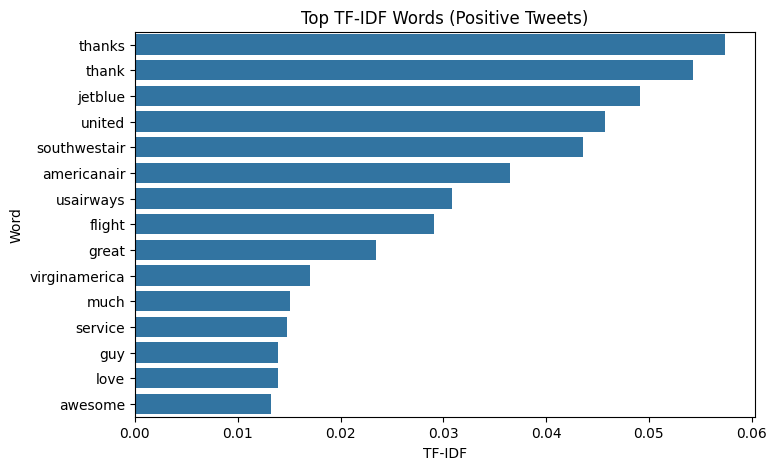

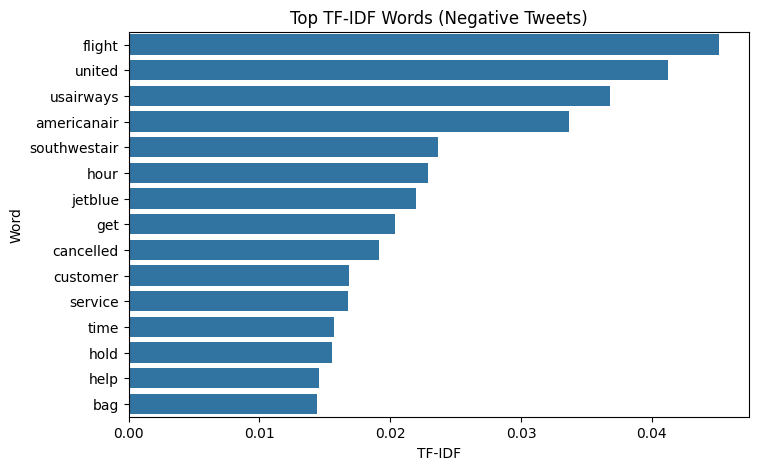

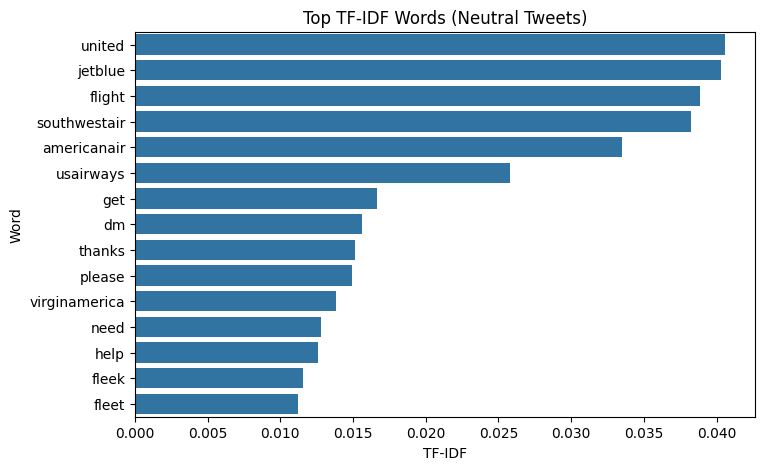

In [13]:
def plot_top_words(words, title):
    words_df = pd.DataFrame(words, columns=['Word', 'TF-IDF'])
    plt.figure(figsize=(8,5))
    sns.barplot(x='TF-IDF', y='Word', data=words_df)
    plt.title(title)
    plt.show()

plot_top_words(top_pos_words, "Top TF-IDF Words (Positive Tweets)")
plot_top_words(top_neg_words, "Top TF-IDF Words (Negative Tweets)")
plot_top_words(top_neu_words, "Top TF-IDF Words (Neutral Tweets)")
